<a href="https://colab.research.google.com/github/ABHIRAM199/my_practice/blob/main/car_resale_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Resale car price prediction using Linear Regression

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [4]:
#importing the drive module from the Google Colab for access to Google Drive

from google.colab import drive

In [5]:
#mounting the google drive to the directory

drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#data file path

df = pd.read_csv('/content/drive/My Drive/DSML/Linear Regression/CAR DECKO/CarPred.csv')

df

,make,transmission_type,seats_cop,seats_family,seats_large,fuel_cng,fuel_diesel,fuel_electric,fuel_lpg,fuel_patrol,seller_dealer,seller_self,year,km_driven,engine,max_power,model,selling_price
0,hyundai,0,0,0,1,0,0,1,0,0,0,1,2009,42945,2492,287,verna,210447.937555
1,toyota,0,0,0,1,0,0,0,0,1,1,0,2003,176401,3240,88,corolla,272870.715932
2,ford,1,0,0,0,0,0,0,0,1,1,1,2018,46852,3250,169,aspire,251387.190744
3,honda,1,0,0,0,0,1,0,0,0,1,1,2014,162580,1317,99,jazz,139196.325731
4,hyundai,1,0,0,1,0,1,0,0,0,1,1,2004,11264,3268,196,i10,227022.794299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,toyota,0,0,1,0,0,0,0,0,1,1,0,2017,26164,4165,496,corolla,390288.866421
19996,hyundai,1,0,0,1,1,0,0,0,0,1,0,2011,121063,3164,162,i10,278819.752112
19997,honda,1,1,0,0,0,0,0,0,0,0,0,2005,155570,2533,299,civic,207397.304669
19998,honda,1,0,0,1,0,0,0,0,1,0,0,2008,193188,2015,125,city,183440.751987


In [7]:
df.head()

,make,transmission_type,seats_cop,seats_family,seats_large,fuel_cng,fuel_diesel,fuel_electric,fuel_lpg,fuel_patrol,seller_dealer,seller_self,year,km_driven,engine,max_power,model,selling_price
0,hyundai,0,0,0,1,0,0,1,0,0,0,1,2009,42945,2492,287,verna,210447.937555
1,toyota,0,0,0,1,0,0,0,0,1,1,0,2003,176401,3240,88,corolla,272870.715932
2,ford,1,0,0,0,0,0,0,0,1,1,1,2018,46852,3250,169,aspire,251387.190744
3,honda,1,0,0,0,0,1,0,0,0,1,1,2014,162580,1317,99,jazz,139196.325731
4,hyundai,1,0,0,1,0,1,0,0,0,1,1,2004,11264,3268,196,i10,227022.794299


In [8]:
#define x and y where x--> independent variable, y-->dependent or target variable

x= df["max_power"].values
y= df["selling_price"].values

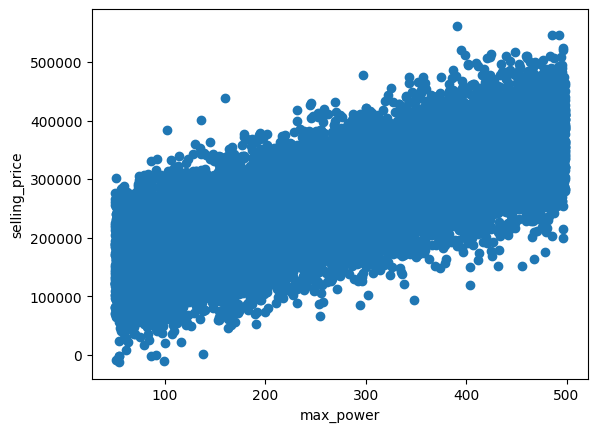

In [9]:
plt.scatter(x,y)
plt.xlabel("max_power")
plt.ylabel("selling_price")
plt.show()

In [10]:
df.columns

Index(['make', 'transmission_type', 'seats_cop', 'seats_family', 'seats_large',
       'fuel_cng', 'fuel_diesel', 'fuel_electric', 'fuel_lpg', 'fuel_patrol',
       'seller_dealer', 'seller_self', 'year', 'km_driven', 'engine',
       'max_power', 'model', 'selling_price'],
      dtype='object')

In [11]:
#simulation for linearity
#fit linear regression model

X=df[['year', 'km_driven', 'engine', 'max_power', 'transmission_type', 'seats_cop', 'seats_family', 'seats_large', 'fuel_cng', 'fuel_diesel', 'fuel_electric', 'fuel_patrol', 'fuel_lpg', 'fuel_electric', 'seller_dealer', 'seller_self']]
y=df['selling_price']

In [12]:
import statsmodels.api as sm
#Add a constant term with X part
X_with_const= sm.add_constant(X)
#Fit linear regression model,OLS=ordinary least square
model = sm.OLS(y,X_with_const).fit()

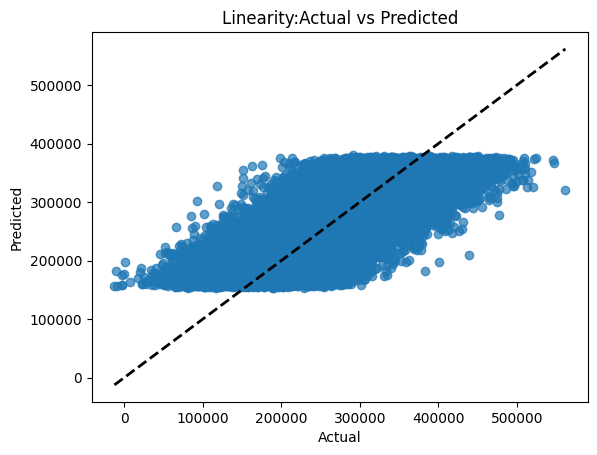

In [13]:
#check linearity assumption by plotting actual vs predicted values

plt.scatter(y,model.predict(),alpha=0.7)
plt.plot([y.min(),y.max()],[y.min(),y.max()],'k--',lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Linearity:Actual vs Predicted')
plt.show()

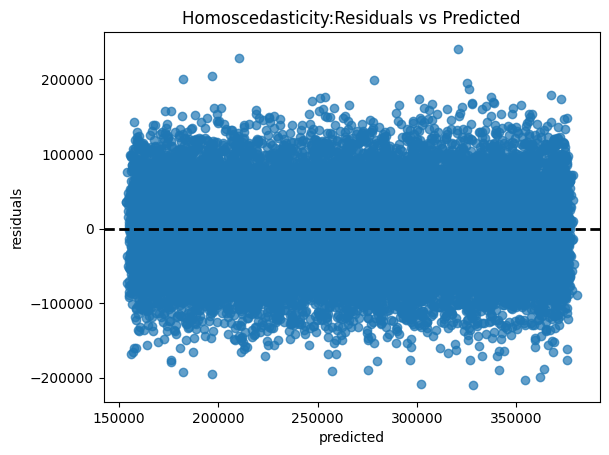

In [14]:
#Simulation for Homoscedasticity (constant variance/residuals)
#check homoscedasticity by plotting residuals vs predicted values

residuals = model.resid
plt.scatter(model.predict(),residuals,alpha=0.7)
plt.xlabel('predicted')
plt.ylabel('residuals')
plt.title('Homoscedasticity:Residuals vs Predicted')
plt.axhline(y=0,color='k',linestyle='--',lw=2)
plt.show()

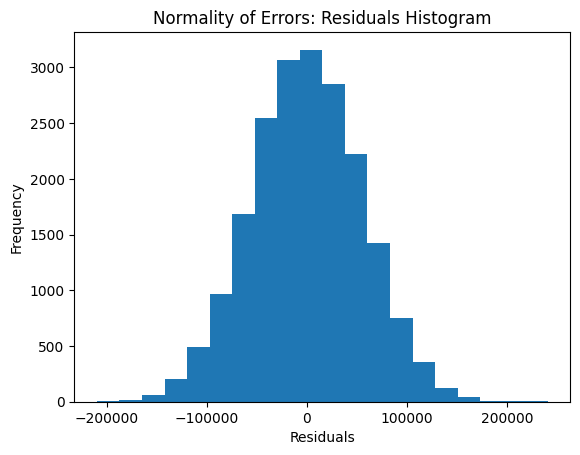

In [15]:
#simulation of Normality of Errors
#check normality of errors by plotting histogram of residuals

plt.hist(residuals,bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Normality of Errors: Residuals Histogram')
plt.show()

In [16]:
#simulation for no Autocorrelation
#check the independence of errors using the Durbin-Watson test(DW statistics)

durbin_watson = sm.stats.stattools.durbin_watson(residuals)
print("Durbin-Watson statistic: ",durbin_watson)


Durbin-Watson statistic:  2.01352969275313


implies no significant autocorrelation


In [17]:
#simulation for no perfect multicollinearity

#check for multicollinearity using variance inflation factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data =X_with_const.copy()
vif_data = vif_data.drop(columns='const') #Exclude the constant term
vif = pd.DataFrame()
vif['variable'] =vif_data.columns
vif["VIF"] = [variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])]
print(vif)

             variable        VIF
0                year  56.648571
1           km_driven   4.007914
2              engine   7.729838
3           max_power   5.478773
4   transmission_type   1.998263
5           seats_cop   2.010321
6        seats_family   3.019145
7         seats_large   5.036540
8            fuel_cng   1.994996
9         fuel_diesel   3.047902
10      fuel_electric        inf
11        fuel_patrol  17.090605
12           fuel_lpg   9.085081
13      fuel_electric        inf
14      seller_dealer   1.995045
15        seller_self   1.977211


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [20]:
def univariate_linear_hypothesis(x,theta): #Defining a function which takes input vector x and a list theta containing theta0 and theta1
  y_hat = theta[0]+theta[1]*x
  return y_hat

In [21]:
# Defining Cost Function
def cost(X,Y,theta):
  m = X.shape[0] #number of training examples
  total_error = 0.0
  for i in range(m):
    y_hat = univariate_linear_hypothesis(X[i],theta)
    total_error += (y_hat - Y[i])**2
    return total_error/m

In [26]:
#creating simple convex function Y=(x-5)**2
#create some random data for X values

X = np.arange(10)
Y = (X-5)**2

<ipython-input-27-7d77c578fe52>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


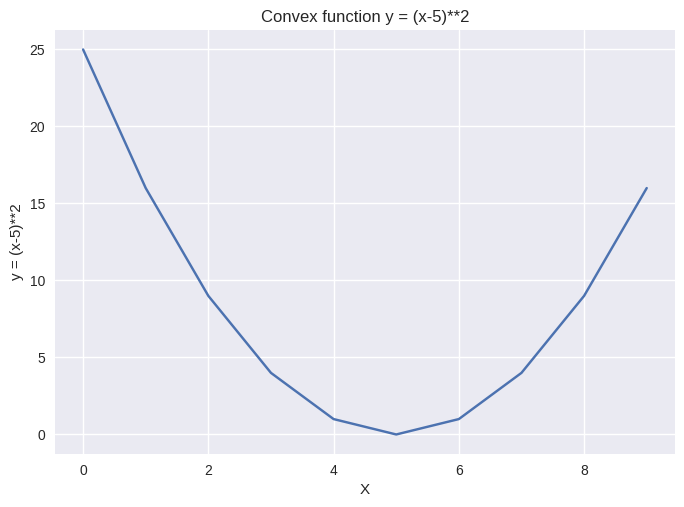

In [27]:
# We are creating a simple convex function y = (x-5)^2.
# Our goal is to visualize this function and demonstrate how the gradient descent approach works.

# Create some random data for X values
X = np.arange(10)

# Define the convex function y = (x-5)^2
Y = (X-5)**2  # X = 5, cost function will give minimum (0)

# Plot the convex function
plt.style.use("seaborn")
plt.plot(X, Y)
plt.xlabel("X")
plt.ylabel("y = (x-5)**2")
plt.title("Convex function y = (x-5)**2")
plt.show()

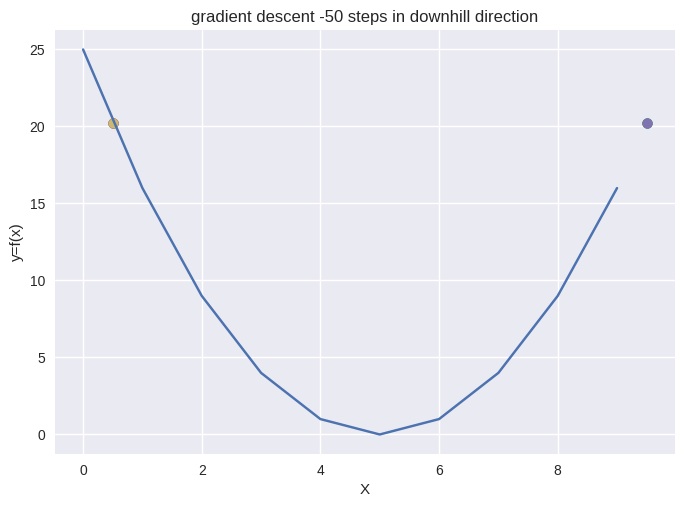

In [29]:
#Gradient descent without learning rate

import time
fig = plt.figure()
ax= fig.add_subplot(111)
plt.ion()
x=0.5
y=(x-5)**2
plt.plot(X,Y)
plt.scatter(x,y)
plt.xlabel("X")
plt.ylabel("y=f(x)")
plt.title("gradient descent -50 steps in downhill direction")
#plt.show()
lr=0.1 #not using in the equation now
errors = []
for i in range(10):
  grad = 2*(x-5)
  x = x-grad
  y =(x-5)**2
  error = y-0
  errors.append(error)
  plt.scatter(x,y)
  fig.canvas.draw()
  time.sleep(0.5)

plt.show()


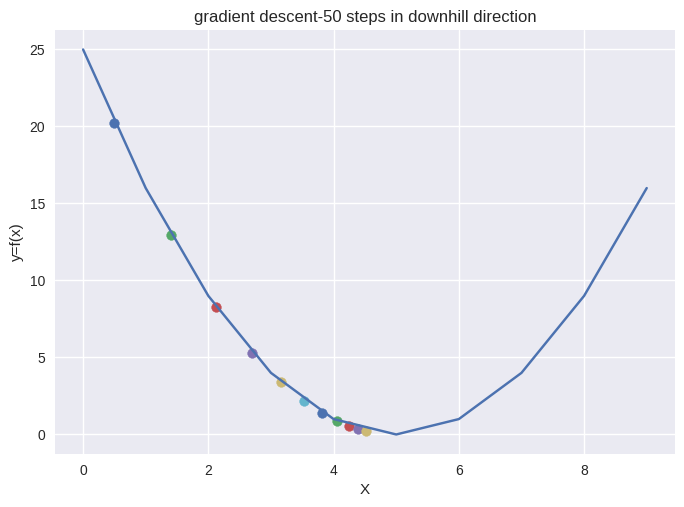

In [30]:
#Gradient descent with learning rate

import time
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
x = 0.5
y = (x-5)**2
plt.plot(X,Y)
plt.scatter(x,y)
plt.xlabel("X")
plt.ylabel("y=f(x)")
plt.title("gradient descent-50 steps in downhill direction")
#plt.show()
lr = 0.1
errors = []
for i in range(10):
  grad = 2*(x-5)
  x = x-lr*grad
  y = (x-5)**2
  error = y-0
  errors.append(error)
  plt.scatter(x,y)
  fig.canvas.draw()
  time.sleep(0.5)

plt.show()

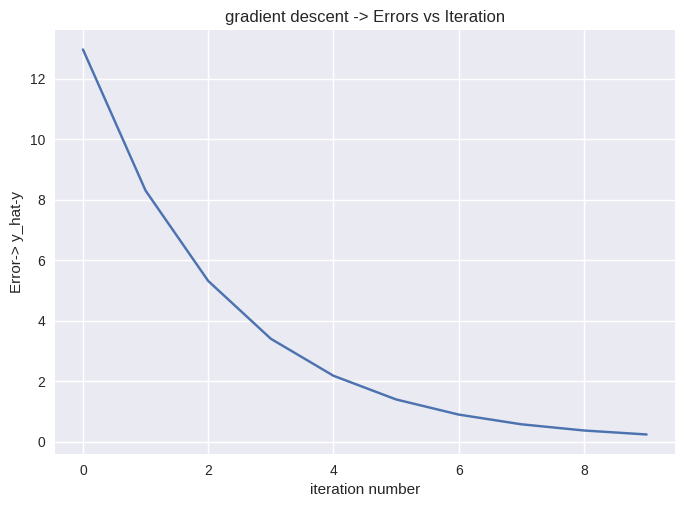

In [31]:
plt.plot(errors)
plt.xlabel("iteration number")
plt.ylabel("Error-> y_hat-y")
plt.title("gradient descent -> Errors vs Iteration")
plt.show()

In [115]:
#Use case simulation
X = df["max_power"].values
Y = df["selling_price"].values
#standard Normalisation
u =X.mean()
std = X.std()
X = (X-u)/std

In [116]:
#Linear Regression Hypothesis function

def hypothesis(x,theta):
  y_hat = theta[0]+theta[1]*x
  return y_hat

In [117]:
#gradient computation for linear regression

def gradient (X,Y,theta):
  m = X.shape[0]
  grad = np.zeros((2,)) #initializing gradient vector with zeros for theta0 and theta1
  for i in range(m):
    x = X[i] #current input
    y_hat = hypothesis(x,theta)
    y = Y[i] #Actual output
    #updating gradients for theta0 and theta1
    grad[0] += (y_hat-y) #partial derivative of cost with respect to theta0
    grad[1] += (y_hat-y)*x #partial derivative of cost with respect to theta1

  return grad/m #average gradient over all examples

In [118]:
#Error calculation for linear Regression

def error(X,Y,theta):
  m = X.shape[0]
  total_error = 0.0
  for i in range(m):
    x = X[i] #current input
    y_hat = hypothesis(x,theta) #compute hypothesis for the current input
    y = Y[i] #Actual output
    error_i = (y_hat - y)**2 #compute the squared error for the current example
    total_error += error_i #accumulate the squared error

  return (total_error/m) #return the mean squared error



In [119]:
#Gradient Descent optimization for Linear Regression

def gradient_descent(X,Y,max_steps=100,learning_rate=0.1):
  theta = np.zeros((2,)) #initialize weights theta0 and theta1 to zero
  error_list = []
  theta_list = []
  for i in range(max_steps):
    grad = gradient(X,Y,theta) #compute gradient using gradient functin
    e = error(X,Y,theta) #compute error using error function
    #update weights theta0 and theta1 using the learning rate and gradients
    theta[0] = theta[0]-learning_rate*grad[0]
    theta[1] = theta[1]-learning_rate*grad[1]

    #store the updated theta values during each iteration
    theta_list.append((theta[0],theta[1]))
    #store the updated error during each iteration
    error_list.append(e)

  return theta,error_list,theta_list




In [120]:
theta,error_list,theta_list = gradient_descent(X,Y,max_steps=50)

In [121]:
print(theta)

[264899.50073976  63178.39015021]


In [122]:
df

,make,transmission_type,seats_cop,seats_family,seats_large,fuel_cng,fuel_diesel,fuel_electric,fuel_lpg,fuel_patrol,seller_dealer,seller_self,year,km_driven,engine,max_power,model,selling_price
0,hyundai,0,0,0,1,0,0,1,0,0,0,1,2009,42945,2492,287,verna,210447.937555
1,toyota,0,0,0,1,0,0,0,0,1,1,0,2003,176401,3240,88,corolla,272870.715932
2,ford,1,0,0,0,0,0,0,0,1,1,1,2018,46852,3250,169,aspire,251387.190744
3,honda,1,0,0,0,0,1,0,0,0,1,1,2014,162580,1317,99,jazz,139196.325731
4,hyundai,1,0,0,1,0,1,0,0,0,1,1,2004,11264,3268,196,i10,227022.794299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,toyota,0,0,1,0,0,0,0,0,1,1,0,2017,26164,4165,496,corolla,390288.866421
19996,hyundai,1,0,0,1,1,0,0,0,0,1,0,2011,121063,3164,162,i10,278819.752112
19997,honda,1,1,0,0,0,0,0,0,0,0,0,2005,155570,2533,299,civic,207397.304669
19998,honda,1,0,0,1,0,0,0,0,1,0,0,2008,193188,2015,125,city,183440.751987


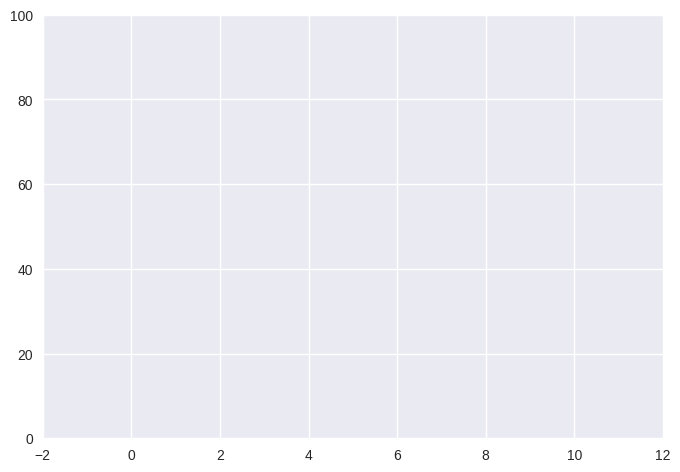

In [123]:
#Animate visualization of linear Regression training
#import necessary libraries
import time
import numpy as np
import matplotlib.pyplot as plt

#initialize the figure and subplot
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

#Iterate through optimized model parameters
for intercept,slope in theta_list:

  #set the x axis and y-axis limits for better visualization
  ax.set_xlim([-2,12])
  ax.set_ylim([0,100])

  #generate x values for the regression line
  x_vals = np.array(ax.get_xlim()) #fix:call ac.get_xlim()and convert to np.array
  y_vals = intercept + slope * x_vals

  #plot the original data points in steel blue
  ax.scatter(X,Y,color = "steelblue")

  #plot the regression line in orange
  ax.plot(x_vals,y_vals,color ='orange')

  #update the plot in the animation
  fig.canvas.draw()

  #add a delay for better visualization
  time.sleep(0.5)

#display the final plot
plt.show()

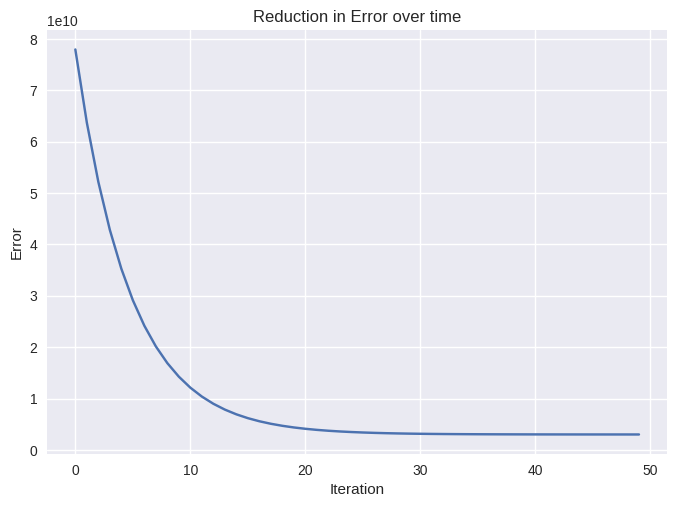

In [124]:
#initialize a new figure for the plot
fig = plt.figure()
#plot the error values over iterations
plt.plot(error_list)
#set the title and axis labels for better interpretation
plt.title('Reduction in Error over time')
plt.xlabel('Iteration')
plt.ylabel('Error')

#display the plot
plt.show()


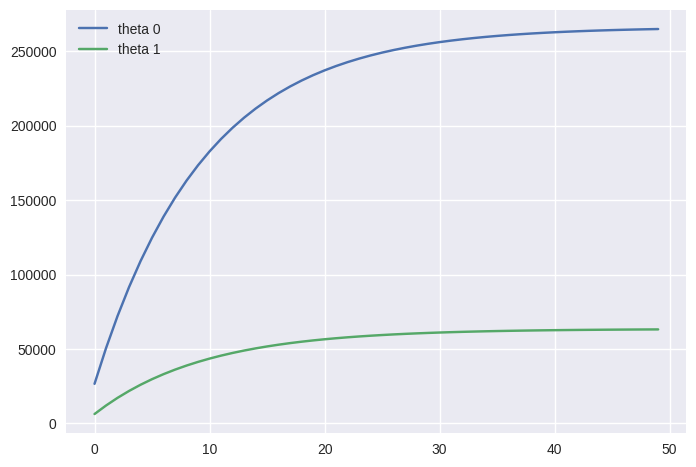

In [125]:
#intitialize a new figure for the plot
fig = plt.figure()
#Extract theta0 and theta1 values from 'theta_list'
theta_list = np.array(theta_list)

#plot changes in theta0 and theta1 over iterations
plt.plot(theta_list[:,0],label = "theta 0")
plt.plot(theta_list[:,1],label = "theta 1")

#add a legend for better interpretation
plt.legend()

#display the plot
plt.show()

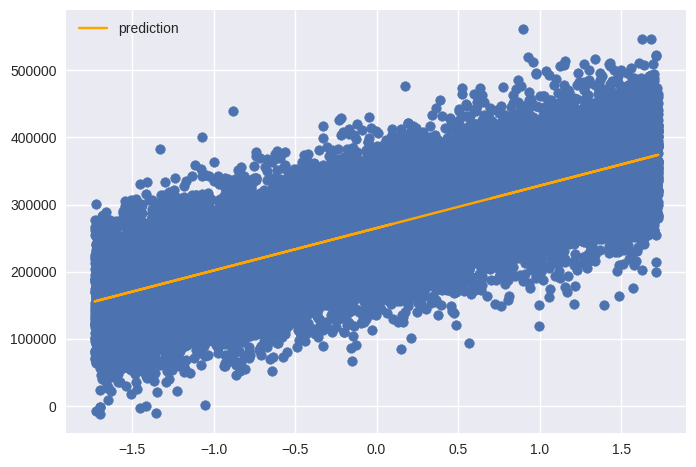

In [126]:
#initialize a new figure for the plot
fig = plt.figure()

#compute predicted values using the trained model parameters

Y_hat = hypothesis(X,theta)

#scatter plot of the original data points
plt.scatter(X,Y)

#plot the regression line representing the model's prediction in orange
plt.plot(X,Y_hat,color = 'orange',label = 'prediction')

#add a legend for better interpretation
plt.legend()

#display the plot
plt.show()

In [127]:
#Matrics for evaluating Regression Model

import numpy as np
def r2_square(Y,Y_hat):
  num = np.sum((Y-Y_hat)**2) #calculate the sum of squared difference b/w actual and predicted
  denom = np.sum((Y-np.mean(Y))**2) # calculate total sum of squares

  score = 1 - num/denom #compute R square score

  return score


In [128]:
r2_square(Y,Y_hat)

0.5723904236945001

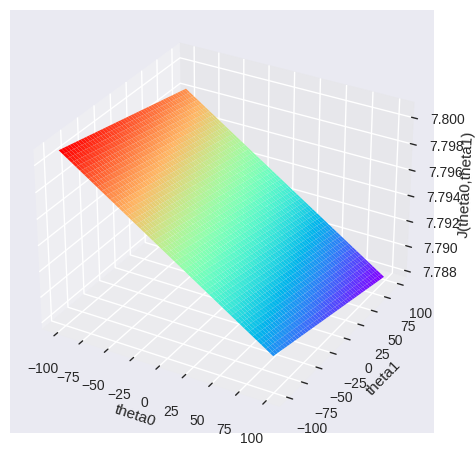

In [130]:
#3D visualization of cost function

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Define a range of values for theta0 and theta1
T0 = np.arange(-100,100,1)
T1 = np.arange(-100,100,1)

#create a meshgrid of theta0 and theta1 values
T0,T1 = np.meshgrid(T0,T1)
J = np.zeros(T0.shape)

#calculate the cost(J) for each combination of theta0 and theta1

for i in range(J.shape[0]):
  for j in range(J.shape[1]):
    Y_hat = T1[i,j]*X + T0[i,j]
    J[i,j] = np.sum(((Y-Y_hat)**2)/Y.shape[0])

#create a 3D plot of the cost function
fig = plt.figure()
axes = fig.add_subplot(111,projection= '3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')

#label axes for better interpretation
axes.set_xlabel("theta0")
axes.set_ylabel("theta1")
axes.set_zlabel("J(theta0,theta1)")

plt.show()

In [131]:
#linear regression using scikit-learn
from sklearn.linear_model import LinearRegression
model =LinearRegression() #creating an instance of the linear regression model


In [133]:
import pandas as pd
X = pd.Series(X)
Y = pd.Series(Y)

#convert to NumPy array and reshape
X = X.values.reshape(X.size,1)
Y = Y.values.reshape(Y.size,1)
print(X.shape)
print(Y.shape)



(20000, 1)
(20000, 1)


In [134]:
#Use the fit method to train the model
model.fit(X,Y)

LinearRegression()

In [136]:
#After training we can access the intercept and coefficients of the linear regression model

model.intercept_


array([266271.80577075])

In [137]:
model.coef_

array([[63505.68417081]])

In [138]:
#scikit-learn provides a score method to calculate the coeficient of determination (R2)of the prediction
model.score(X,Y)

0.5726730479014122

In [140]:
#to make predictions using the trained model, use the predicted method
output = model.predict(X)

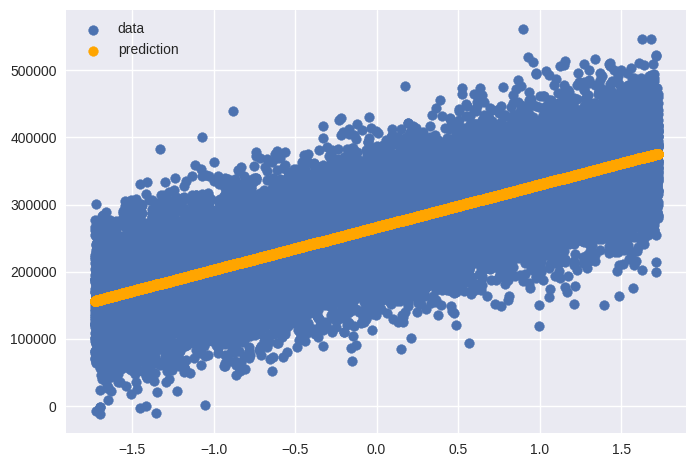

In [141]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.scatter(X,Y,label = 'data') #to plot original data points in blue
plt.scatter(X,output,color='orange',label='prediction')
plt.legend() #for better interpretation
plt.show()